## Quick Start Jupyter Notebook
Load Pandas and the EONR module
After [installation](../../docs/build/html/installation.html), load `Pandas` and the `EONR` module in a Python interpreter

In [1]:
import pandas as pd
from eonr import EONR

Load the data. `EONR` uses Pandas dataframes to access and manipulate the experimental data.

In [2]:
df_data = pd.read_csv(r'data\minnesota_2012.csv')
df_data

,year,location,plot,trt,rep,time_n,rate_n_applied_kgha,yld_grain_dry_kgha,nup_total_kgha,soil_plus_fert_n_kgha
0,2012,Minnesota,101,8,1,Pre,235.3785,12410.916200,198.759898,284.69590
1,2012,Minnesota,102,3,1,Pre,67.2510,10627.946000,147.971755,116.56840
2,2012,Minnesota,103,1,1,Pre,0.0000,7428.081218,98.769392,38.10890
3,2012,Minnesota,104,2,1,Pre,33.6255,9202.953180,111.440210,71.73440
4,2012,Minnesota,105,4,2,Pre,100.8765,10841.127180,142.663887,154.67730
5,2012,Minnesota,106,7,2,Pre,201.7530,10646.649330,178.802092,255.55380
6,2012,Minnesota,107,6,2,Pre,168.1275,12367.436000,186.053531,201.75300
7,2012,Minnesota,108,5,2,Pre,134.5020,13366.361700,196.737290,168.12750
8,2012,Minnesota,201,7,1,Pre,201.7530,14232.053480,228.775204,251.07040
9,2012,Minnesota,202,5,1,Pre,134.5020,14384.824980,226.006218,183.81940


The table containing the experimental data **must** have a minimum of two columns:
* Nitrogen fertilizer rate
* Grain yield

`EONR` accepts custom column names. Just be sure to set them by either using `EONR.set_column_names()` or by passing them to `EONR.calculate_eonr()`. We will declare the names of the these two columns as they exist in the `Pandas` dataframe so they can be passed to `EONR` later:

In [3]:
col_n_app = 'rate_n_applied_kgha'
col_yld = 'yld_grain_dry_kgha'

Each row of data in our dataframe should correspond to a nitrogen rate treatment plot. It is common to have several other columns describing each treatment plot (e.g., year, location, replication, nitrogen timing, etc.). These aren't necessary, but `EONR` will try pull information from "year", "location", and "nitrogen timing" for labeling the plots that are generated (see [Plotting](../../docs/build/html/plotting.html) for more information).

Although optional, it is good practice to declare units so we don't get confused:

In [4]:
unit_currency = '$'
unit_fert = 'kg'
unit_grain = 'kg'
unit_area = 'ha'

These unit variables are only used for plotting (titles and axes labels), and they are not actually used for any computations.

`EONR` computes the _**Economic** Optimum Nitrogen Rate_ for any economic scenario that we define. All that is required is to declare the cost of the nitrogen fertilizer (per unit, as defined above) and the price of grain (also per unit). Note that the cost of nitrogen fertilizer can be set to zero, and the _**Agronomic** Optimum Nitrogen Rate_ will be computed.

In [5]:
cost_n_fert = 0.88  # in USD per kg nitrogen
price_grain = 0.157  # in USD per kg grain

At this point, we can initialize an instance of `EONR`.

Before doing so, we may want to set the base directory. `EONR.base_dir` is the default location for saving plots and data processed by `EONR`. If `EONR.base_dir` is not set, it will be set to be a folder named "eonr_temp_out" in the current working directory during the intitialization (to see your current working directory, type `os.getcwd()`). If you do not wish to use this as your current working directory, it can be passed to the `EONR` instance using the `base_dir` keyword.

For demonstration purposes, we will set `EONR.base_dir` to what would be the default folder if nothing were passed to the `base_dir` keyword --> that is, we will choose a folder named "eonr_temp_out" in the current working directory (`EONR` will create the directory if it does not exist).

And finally, to create an instance of `EONR`, pass the appropriate variables to `EONR()`:

In [6]:
import os
base_dir = os.path.join(os.getcwd(), 'eonr_temp_out')

my_eonr = EONR(cost_n_fert=cost_n_fert,
               price_grain=price_grain,
               col_n_app=col_n_app,
               col_yld=col_yld,
               unit_currency=unit_currency,
               unit_grain=unit_grain,
               unit_fert=unit_fert,
               unit_area=unit_area,
               base_dir=base_dir)

With `my_eonr` initialized as an instance of `EONR`, we can now calculate the economic optimum nitrogen rate by calling the `calculate_eonr()` method and passing the dataframe with the loaded data:

In [7]:
my_eonr.calculate_eonr(df_data)


Computing EONR for Minnesota 2012 Pre
Cost of N fertilizer: $0.88 per kg
Price grain: $0.16 per kg
Economic optimum N rate (EONR): 162.3 kg per ha [130.5, 207.8] (90.0% confidence)
Maximum return to N (MRTN): $767.93 per ha


It may take several seconds to run - this is because it computes the profile-likelihood and bootstrap confidence intervals by default (and as described in the [Background section](#background) this is the real novelty of `EONR` package).

And that's it! The economic optimum for this dataset and economic scenario was **162 kg nitrogen per ha** (with 90% confidence bounds at **131** and **208 kg per ha**) and resulted in a maximum net return of nearly **$770 per ha**. This is great, but of course it'd be useful to see our data and results plotted. Do this by calling the ```plot_eonr()``` module and passing the minimum/maximum values for each axis (optional):

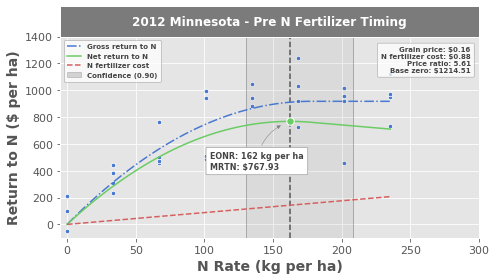

In [8]:
my_eonr.plot_eonr(x_min=-5, x_max=300, y_min=-100, y_max=1400)